In [1]:
import random
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
X_test = np.load("malignant_resized(228x400)/X_test-228x400.npy")
y_test = np.load("malignant_resized(228x400)/y_test-228x400.npy")

In [3]:
model = load_model("mal-model.h5")

In [4]:
model.load_weights("checkpoints/weights-improvement-45-0.81.hdf5")

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       695
           1       0.77      0.41      0.53       112
           2       0.84      0.68      0.75       161
           3       0.57      0.86      0.68       118

    accuracy                           0.81      1086
   macro avg       0.76      0.71      0.71      1086
weighted avg       0.82      0.81      0.80      1086



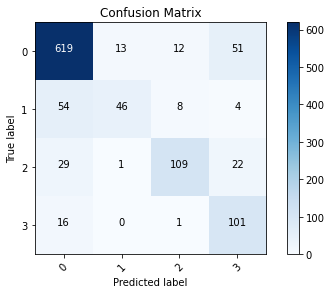

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

cm_plot_labels = ['0','1','2','3']

y_pred = np.argmax(model.predict(X_test), axis=-1)

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

print(classification_report(y_test, y_pred))